In [1]:
# Loading of all necessary imports
# Using Seaborn instead of matplotlib for most plots as it has more powerful plots out of the box
import pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
from matplotlib import colors
from datetime import datetime 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.regression.mixed_linear_model import MixedLMParams

In [2]:
# Local source of data
data_path = "../data/"
sns.set_theme()

In [3]:
participant_path = join(data_path, "processed", "participant_data.csv.gz")
df_participants = pd.read_csv(participant_path, compression='gzip')
df_participants.set_index("participant_id", inplace=True)

df = df_participants[['stai', 'psqi', 'gender', 'age', 'shift']].dropna()
df['age'] = df['age'] /5 -5
df['age'] = df['age'].apply(lambda x: 0 if x < 0 else x)

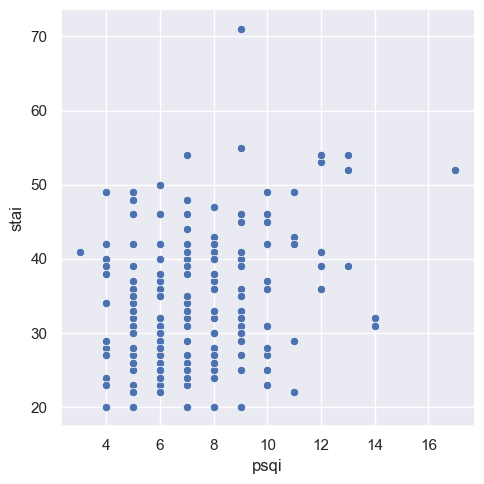

In [4]:
sns.relplot(x=df['psqi'], y=df['stai'])

In [5]:
model = smf.ols('stai ~ psqi + age + C(gender) + C(shift)', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   stai   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.681
Date:                Mon, 01 Apr 2024   Prob (F-statistic):            0.00645
Time:                        17:45:52   Log-Likelihood:                -724.88
No. Observations:                 205   AIC:                             1460.
Df Residuals:                     200   BIC:                             1476.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.1341      2.314     12.589      0.000      24.571      33.697
C(gender)[T.2]      1.4725      1.274      1.156      0.249      -1.040       3.985
C(shift)[T.2.0]    -0.4912      1.262     -0.389      0.698      -2.980       1.998
psqi                0.8139      0.259      3.146      0.002       0.304       1.324
age                -0.5198      0.350     -1.485      0.139      -1.210       0.170
==============================================================================
Omnibus:                       11.960   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.333
Skew:                           0.563   Prob(JB):                      0.00210
Kurtosis:                       3.422   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
for table in result.summary().tables:
    print(table.as_latex_tabular())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &       stai       & \textbf{  R-squared:         } &    0.069  \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &    0.050  \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &    3.681  \\
\textbf{Date:}             & Mon, 01 Apr 2024 & \textbf{  Prob (F-statistic):} & 0.00645   \\
\textbf{Time:}             &     17:45:52     & \textbf{  Log-Likelihood:    } &  -724.88  \\
\textbf{No. Observations:} &         205      & \textbf{  AIC:               } &    1460.  \\
\textbf{Df Residuals:}     &         200      & \textbf{  BIC:               } &    1476.  \\
\textbf{Df Model:}         &           4      & \textbf{                     } &           \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &           \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}
\begin{center}
\begin{tabular}{lccc

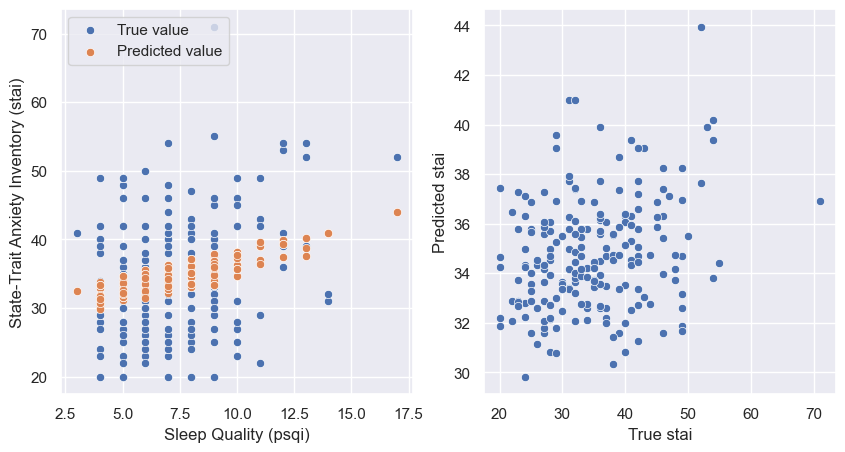

In [7]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
img = sns.scatterplot(ax=axes[0], x=df['psqi'], y=df['stai'])
img = sns.scatterplot(ax=axes[0], x=df['psqi'], y=result.predict())
img.set(xlabel='Sleep Quality (psqi)', ylabel='State-Trait Anxiety Inventory (stai)')
img.legend(loc='upper left', labels=['True value', 'Predicted value'])

img2 = sns.scatterplot(ax=axes[1], y=result.predict(), x=df['stai'])
img2.set(xlabel='True stai', ylabel='Predicted stai')
fig.savefig('../sleepQualityAnxietyPlot.jpg')